In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
import pickle
import cv2

In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
tf.__version__

'2.1.0'

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
with open('/content/gdrive/My Drive/Image Data/image_dict_train_small.pickle', 'rb') as f:
  image_data = pickle.load(f)

In [0]:
with open('/content/gdrive/My Drive/Image Data/image_label.pickle', 'rb') as f:
  y = pickle.load(f)

In [0]:
## drive.flush_and_unmount() # colab is mounted

In [0]:
image_data = image_data["image_data"]

In [0]:
# image_data = image_data[:3000]
# y = y[:3000]

In [0]:
type(image_data)

numpy.ndarray

In [0]:
image_data.shape

(29000, 200, 200, 3)

In [0]:
y

array(['A', 'A', 'A', ..., 'C', 'C', 'C'], dtype='<U7')

In [0]:
y[5000] # 'E'

In [0]:
print(len(image_data))
print(len(y))

29000
29000


In [0]:
# To see the total variables which initiallized within the notebook
%who # To see only var name
%whos # To see full dec of var

In [0]:
X = []
for i in range(len(image_data)):
  img = (cv2.resize(image_data[i], (224, 224), interpolation = cv2.INTER_AREA))/255
  X.append(img)

In [0]:
X = np.asarray(X)

In [0]:
X.shape

In [0]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
y = lab.fit_transform(y)

In [0]:
images_names = lab.classes_

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, stratify = y)

In [0]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [0]:
y_train

In [0]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

In [0]:
base_model = MobileNetV2(weights = "imagenet", include_top = False)

/tensorflow-2.1.0/python3.6/keras_applications/mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [0]:
X_train = base_model.predict(X_train)
X_train.shape

(2250, 7, 7, 1280)

In [0]:
X_test = base_model.predict(X_test)
X_test.shape

(750, 7, 7, 1280)

In [0]:
X_train = X_train.reshape(X_train.shape[0], 7*7*1280)
X_test = X_test.reshape(X_test.shape[0], 7*7*1280)

In [0]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [0]:
X_train = mm.fit_transform(X_train)
X_test = mm.fit_transform(X_test)

In [0]:
X_test.shape

(750, 62720)

In [0]:
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Dropout

In [0]:
model = models.Sequential()
model.add(Dense(1024, activation='relu', input_shape=(62720,)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))


In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint
mcp_save = ModelCheckpoint('weight.hdf5', save_best_only=True, monitor='val_loss', mode='min')

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [0]:
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test), callbacks=[mcp_save], batch_size=128)

Train on 2250 samples, validate on 750 samples
Epoch 1/500
2250/2250 [==============================] - 3s 1ms/sample - loss: 2.2309 - accuracy: 0.5733 - val_loss: 0.0418 - val_accuracy: 0.9827
Epoch 2/500
2250/2250 [==============================] - 8s 4ms/sample - loss: 0.3645 - accuracy: 0.9111 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 3/500
2250/2250 [==============================] - 16s 7ms/sample - loss: 0.0552 - accuracy: 0.9840 - val_loss: 2.0993e-05 - val_accuracy: 1.0000
Epoch 4/500
2250/2250 [==============================] - 22s 10ms/sample - loss: 0.0310 - accuracy: 0.9911 - val_loss: 1.0581e-06 - val_accuracy: 1.0000
Epoch 5/500
2250/2250 [==============================] - 16s 7ms/sample - loss: 0.0101 - accuracy: 0.9969 - val_loss: 3.2914e-07 - val_accuracy: 1.0000
Epoch 6/500
2250/2250 [==============================] - 0s 207us/sample - loss: 0.0206 - accuracy: 0.9964 - val_loss: 1.3114e-06 - val_accuracy: 1.0000
Epoch 7/500
2250/2250 [==========================

In [0]:
history_dict = history.history

In [0]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [0]:
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

In [0]:
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

In [0]:
epochs = np.arange(500)

In [0]:
def loss_plot():
  plt.plot(epochs, loss, 'b', label = "Traininig Loss")
  plt.plot(epochs, val_loss, 'bo', label = "Validation Loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

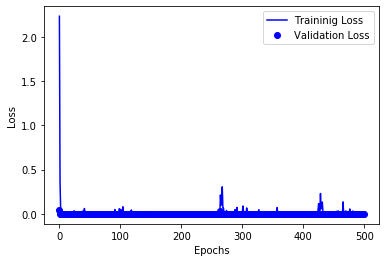

In [0]:
loss_plot()

In [0]:
def acc_plot():
  plt.plot(epochs, acc, 'b', label = "Traininig Accuracy")
  plt.plot(epochs, val_acc, 'bo', label = "Validation Accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()

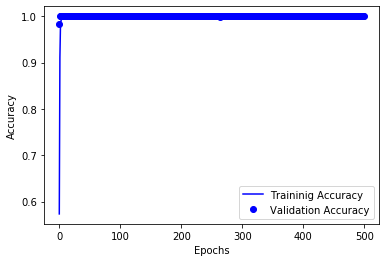

In [0]:
acc_plot()

In [0]:
from tensorflow.keras.preprocessing import image
from tqdm import tqdm


In [0]:
from tensorflow.keras.layers import Dense, InputLayer, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D